In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [1]:
import xarray as xr

# Caminho do arquivo NetCDF
caminho = "data-29-09/grav_32.1.nc"

# Abrir o NetCDF
dados = xr.open_dataset(caminho)

# Mostrar as informações gerais do dataset
print(dados)

# Mostrar as primeiras linhas em formato de tabela
# print(dados.to_dataframe().head())


<xarray.Dataset> Size: 830MB
Dimensions:  (lat: 9600, lon: 21600)
Coordinates:
  * lat      (lat) float64 77kB -79.99 -79.97 -79.96 ... 79.96 79.97 79.99
  * lon      (lon) float64 173kB -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
Data variables:
    z        (lat, lon) float32 829MB ...
Attributes:
    Conventions:  CF-1.7
    history:      grdsample -R-180/180/-80/80 -I1m @GMTAPI@-S-I-G-G-G-N-00000...
    GMT_version:  6.3.0 [64-bit]
    node_offset:  1


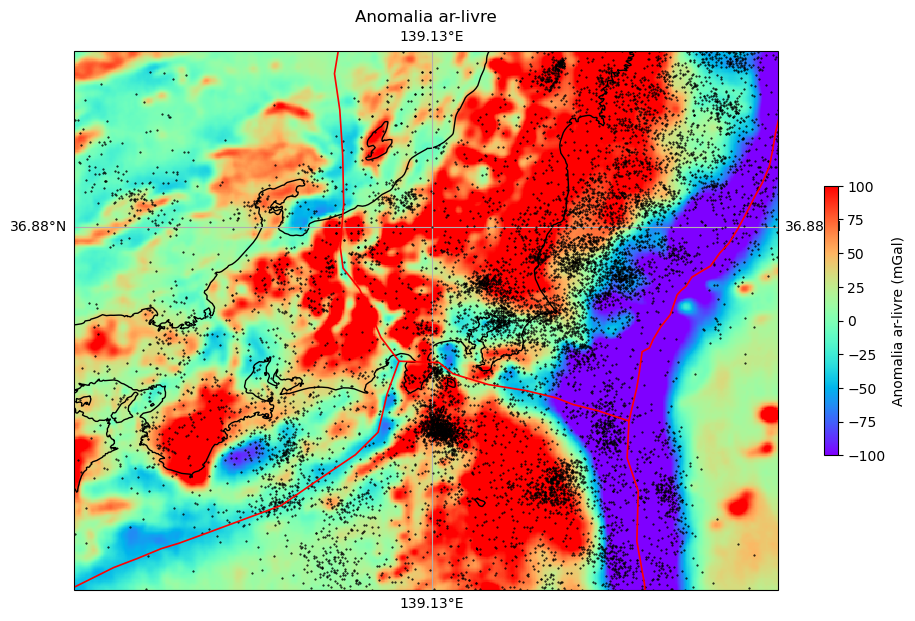

In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import geopandas as gpd
import numpy as np

# Caminhos
caminho_netcdf    = "data-29-09/grav_32.1.nc"
caminho_shapefile = "data-22-09/PB2002_boundaries.shp"

# Área de interesse
longitude_min, longitude_max = 134.13, 143.97
latitude_min,  latitude_max  =   31.88,   39.30

# Escala da barra de cores (mGal)
valor_min, valor_max = -100, 100

# Espaçamento dos ticks (em graus)
espacamento = 5.0  # ex.: 5.0, 2.0, 1.0, 0.5

# --- Abrir NetCDF e recortar ---
dados = xr.open_dataset(caminho_netcdf)
recorte = dados.sel(lon=slice(longitude_min, longitude_max),
                    lat=slice(latitude_min,  latitude_max))

longitudes = recorte.lon.values
latitudes  = recorte.lat.values
matriz_Z   = recorte.z.values
extensao   = [longitudes.min(), longitudes.max(), latitudes.min(), latitudes.max()]

# --- Ler shapefile (SEM recortar) ---
placas = gpd.read_file(caminho_shapefile)  # sem clip

# ===== Estilo idêntico ao GEOTIFF =====
fig = plt.figure(figsize=(12, 7))
ax  = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent(extensao, crs=ccrs.PlateCarree())

# Imagem (imshow + origin='lower' + extent)
imagem_plot = matriz_Z
mapa = ax.imshow(
    imagem_plot,
    origin='lower',
    extent=extensao,
    transform=ccrs.PlateCarree(),
    cmap='rainbow',
    vmin=valor_min, vmax=valor_max,
    interpolation='nearest'
)

# Costas e grade (com espaçamento simples)
ax.coastlines(resolution='10m')
grade = ax.gridlines(
    draw_labels=True, x_inline=False, y_inline=False,
    xlocs=np.arange(longitude_min, longitude_max + 1e-9, espacamento),
    ylocs=np.arange(latitude_min,  latitude_max  + 1e-9, espacamento)
)


# Limites tectônicos (SEM recorte)


# Barra de cores
barra = plt.colorbar(mapa, shrink=0.5)
barra.set_label('Anomalia ar-livre (mGal)')

lat_sismos, lon_sismos = np.loadtxt('data-22-09/loc_sismos.txt', usecols=(0,1), unpack=True)
plt.plot(lon_sismos, lat_sismos, 'ko', markersize=0.5)


placas.plot(ax=ax, color='red', linewidth=1.2, transform=ccrs.PlateCarree())

plt.title('Anomalia ar-livre')
plt.savefig('arlivre.jpeg', dpi=300, bbox_inches='tight')
plt.show()


In [3]:
# ====== Exportar o recorte para TXT (lon lat valor) ======
import pandas as pd

# Caminho do arquivo de saída (.txt)
nome_arquivo_txt = "data-29-09/gravidade_xyz.txt"

# Converte o Dataset recortado para tabela e salva como "lon lat z"
tabela = recorte.to_dataframe().reset_index()[["lon", "lat", "z"]].dropna()
tabela.to_csv(nome_arquivo_txt, sep=" ", header=False, index=False, float_format="%.6f")

# =========================================================


In [4]:
import pandas as pd

preview = pd.read_csv('data-29-09/gravidade_xyz.txt',
    delim_whitespace=True,
    header=None,
    names=['lon', 'lat', 'valor'],
    nrows=20
)

preview


/tmp/ipykernel_17043/1928224000.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  preview = pd.read_csv('data-29-09/gravidade_xyz.txt',


,lon,lat,valor
0,134.141667,31.891667,-49.225910
1,134.158333,31.891667,-49.260300
2,134.175000,31.891667,-49.215614
3,134.191667,31.891667,-48.859566
4,134.208333,31.891667,-48.458683
5,134.225000,31.891667,-47.901871
6,134.241667,31.891667,-47.198177
7,134.258333,31.891667,-46.293724
8,134.275000,31.891667,-44.945587
9,134.291667,31.891667,-43.128902
